@version July 2025
@author Brian Keller
This notebook is for visualizing data from various stages in the static optimization pipeline of the Old Young walking data. 

# Imports and Setup

In [2]:
import opensim as osim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plot sample GRF from raw forces data

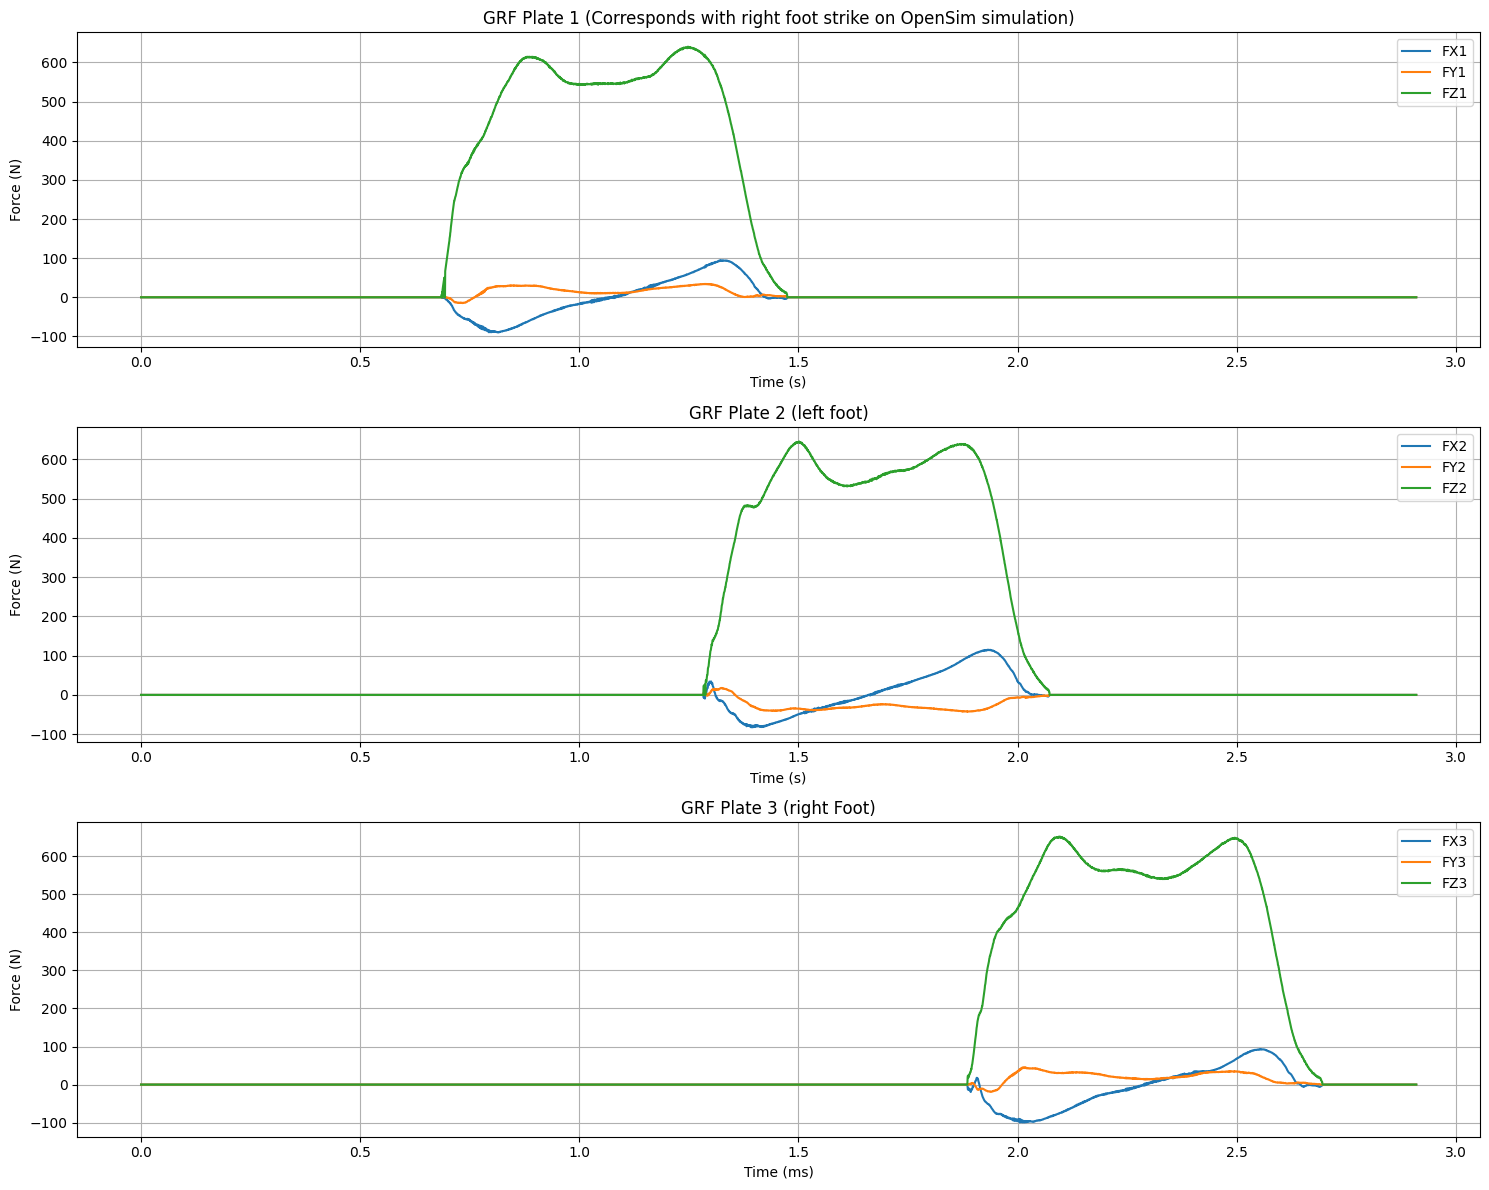

In [113]:
forces_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/Files_W_HJCs/OA1_80_1.forces"
with open(forces_file, 'r') as f:
    lines = f.readlines()
    header_line = lines[4].strip().lstrip('#').split('\t')

# Now load the DataFrame using the cleaned header
raw_df = pd.read_csv(forces_file, sep='\t', skiprows=5, names=header_line)

# If the first column is not time, add a synthetic one
if 'time' not in raw_df.columns[0].lower():
    raw_df.insert(0, 'time', range(len(raw_df)))
#First column is samples, sample rate is 2000 hz: covert to time
raw_df['time'] = raw_df['time'] / 2000
# Set up plotting
plt.figure(figsize=(15, 12))

# Plot forces from plate 1 (assumed Right)
plt.subplot(3, 1, 1)
plt.plot(raw_df['time'], raw_df['FX1'], label='FX1')
plt.plot(raw_df['time'], raw_df['FY1'], label='FY1')
plt.plot(raw_df['time'], raw_df['FZ1'], label='FZ1')
plt.title('GRF Plate 1 (Corresponds with right foot strike on OpenSim simulation)')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# Plot forces from plate 2 (assumed Left)
plt.subplot(3, 1, 2)
plt.plot(raw_df['time'], raw_df['FX2'], label='FX2')
plt.plot(raw_df['time'], raw_df['FY2'], label='FY2')
plt.plot(raw_df['time'], raw_df['FZ2'], label='FZ2')
plt.title('GRF Plate 2 (left foot)')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(raw_df['time'], raw_df['FX3'], label='FX3')
plt.plot(raw_df['time'], raw_df['FY3'], label='FY3')
plt.plot(raw_df['time'], raw_df['FZ3'], label='FZ3')
plt.title('GRF Plate 3 (right Foot)')
plt.xlabel('Time (ms)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot sample GRF's from old dataset

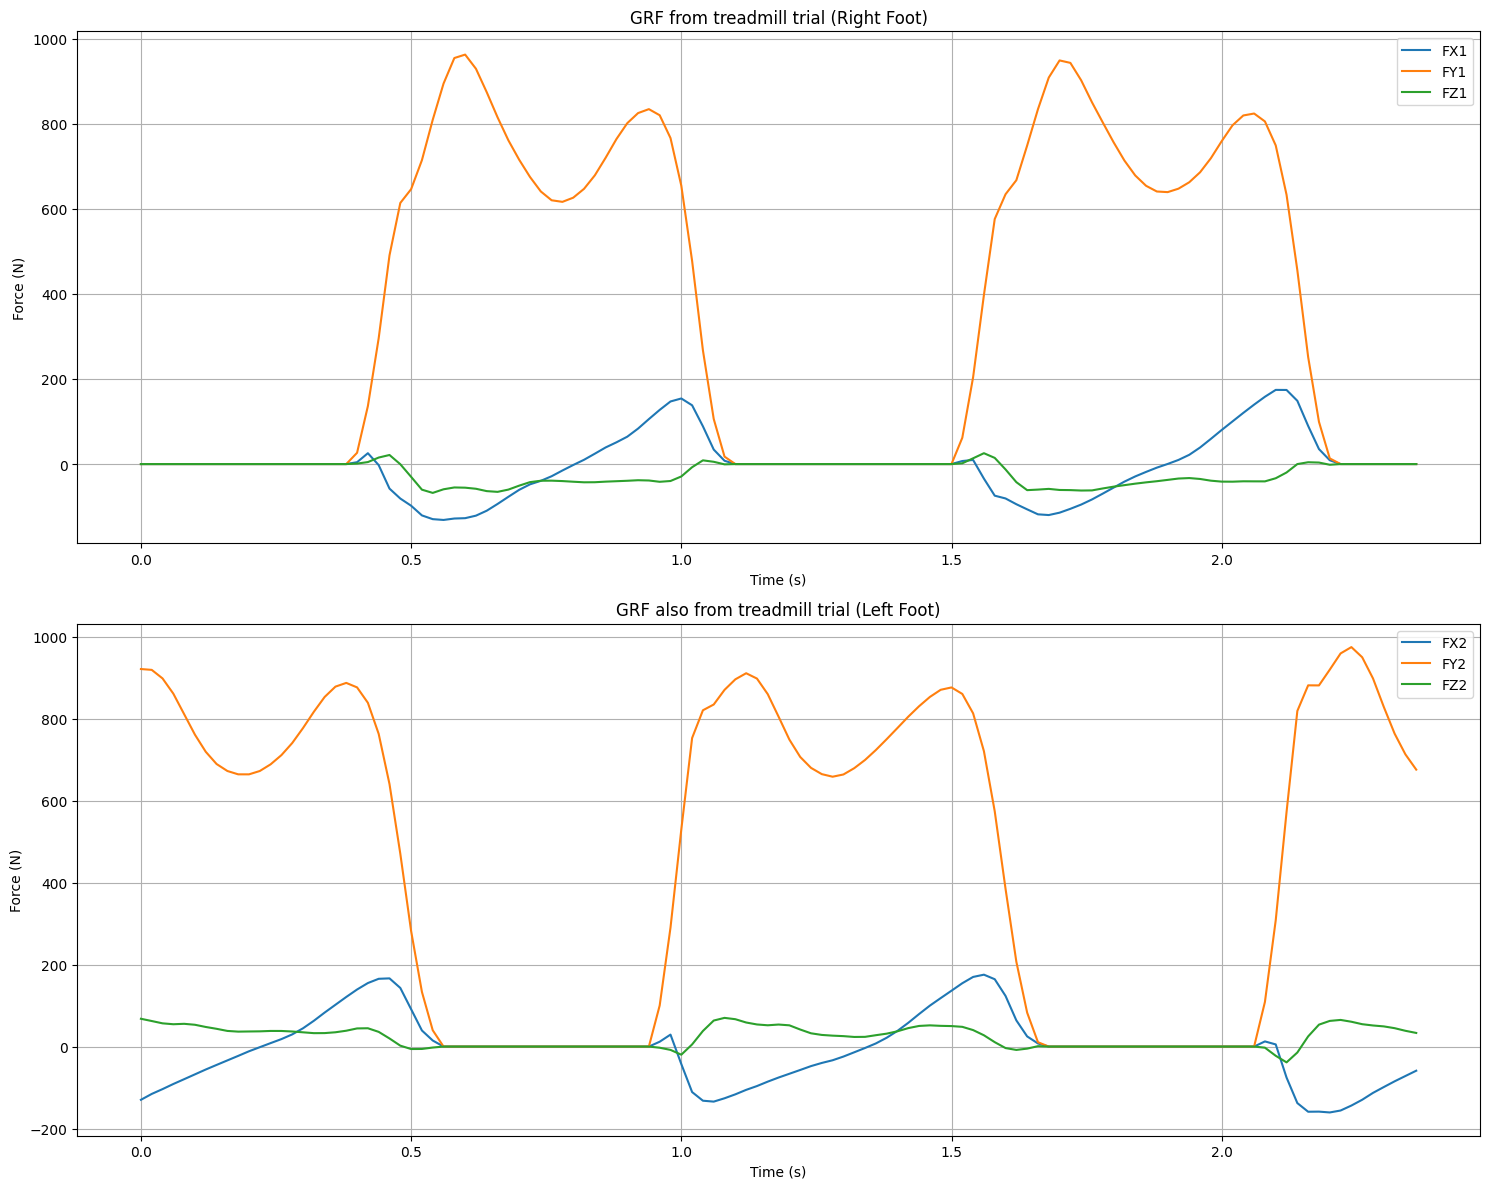

In [114]:
grf_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/ExpmtlData/GRF/walking_baseline1_forces.mot"
with open(grf_file, 'r') as f:
    lines = f.readlines()
    header_line = lines[6].strip().lstrip('#').split('\t')

# Now load the DataFrame using the cleaned header
walking_baseline_df = pd.read_csv(grf_file, sep='\t', skiprows=7, names=header_line)

# If the first column is not time, add a synthetic one
if 'time' not in walking_baseline_df.columns[0].lower():
    walking_baseline_df.insert(0, 'time', range(len(walking_baseline_df)))
#create a subset that is in the same time frame as the Old Young walking trials
walking_baseline_df_subset = walking_baseline_df[walking_baseline_df['time'] < 2.37]
# Set up plotting
plt.figure(figsize=(15, 12))

# Plot forces from plate 1 (assumed Right)
plt.subplot(2, 1, 1)
plt.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['ground_force_vx'], label='FX1')
plt.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['ground_force_vy'], label='FY1')
plt.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['ground_force_vz'], label='FZ1')
plt.title('GRF from treadmill trial (Right Foot)')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

# Plot forces from plate 2 (assumed Left)
plt.subplot(2, 1, 2)
plt.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['1_ground_force_vx'], label='FX2')
plt.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['1_ground_force_vy'], label='FY2')
plt.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['1_ground_force_vz'], label='FZ2')
plt.title('GRF also from treadmill trial (Left Foot)')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Plot joint angles over time for raw IK data trial


/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/1091392052.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ik_df = pd.read_csv(ik_file, delim_whitespace=True, skiprows=10)


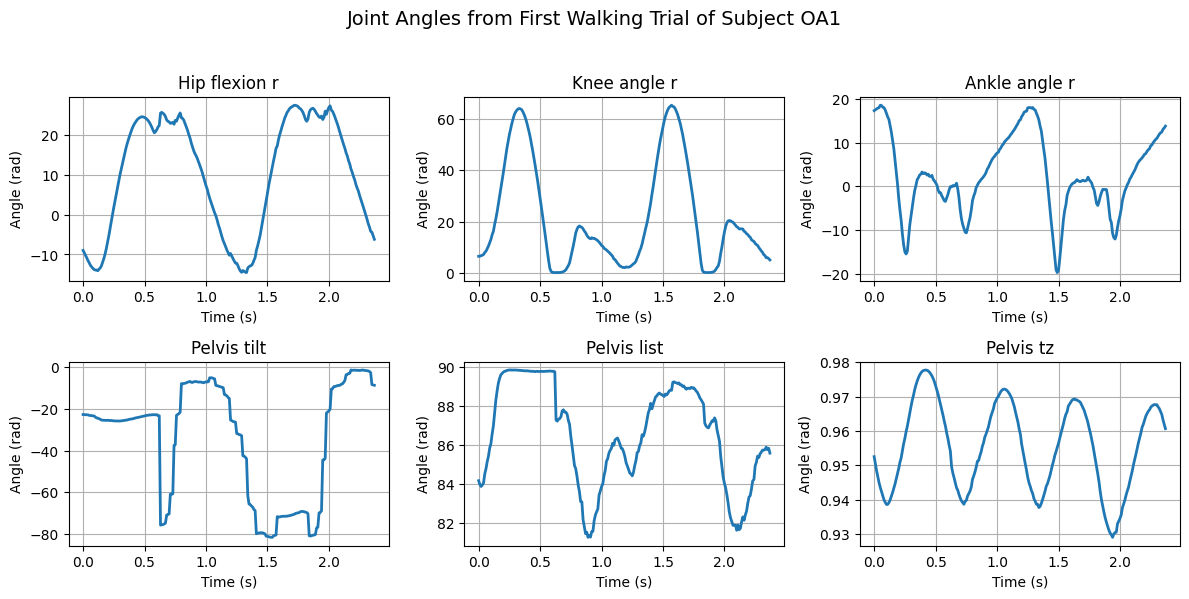

In [125]:
ik_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/Results/IK/ik_output_walk.mot"
joint_names = ['hip_flexion_r', 'knee_angle_r', 'ankle_angle_r', 'pelvis_tilt', 'pelvis_list', 'pelvis_tz']
ik_df = pd.read_csv(ik_file, delim_whitespace=True, skiprows=10)
#extract relevant columns
kept_cols = ['time'] + joint_names
ik_df = ik_df[kept_cols]
#print(ik_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_names):
    if name in ik_df.columns:
        ax = axs[i]
        ax.plot(ik_df['time'], ik_df[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_names), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Angles from First Walking Trial of Subject OA1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Plot joint angles over time for rotated IK data

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2091629334.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ik_df = pd.read_csv(ik_file, delim_whitespace=True, skiprows=10)


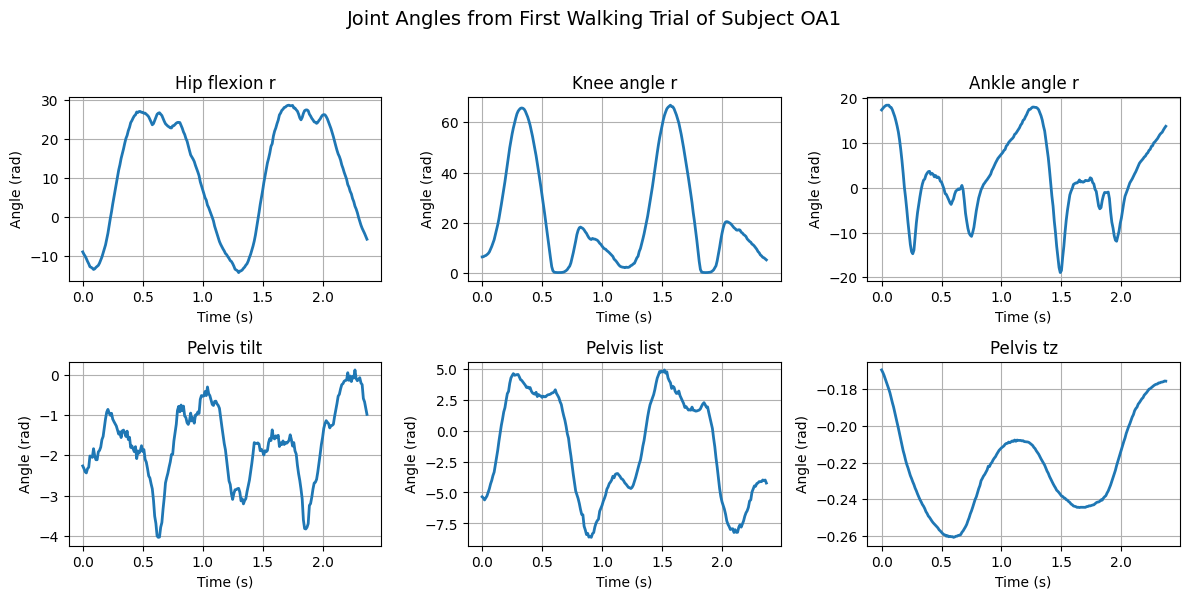

In [124]:
ik_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/Results/IK/ik_output_walk_rotated.mot"
joint_names = ['hip_flexion_r', 'knee_angle_r', 'ankle_angle_r', 'pelvis_tilt', 'pelvis_list', 'pelvis_tz']
ik_df = pd.read_csv(ik_file, delim_whitespace=True, skiprows=10)
#extract relevant columns
kept_cols = ['time'] + joint_names
ik_df = ik_df[kept_cols]
#print(ik_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_names):
    if name in ik_df.columns:
        ax = axs[i]
        ax.plot(ik_df['time'], ik_df[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_names), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Angles from First Walking Trial of Subject OA1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Plot Joint Angles from Ulrich data

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/3548413680.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Tik_df = pd.read_csv(Tik_file, delim_whitespace=True, skiprows=10)


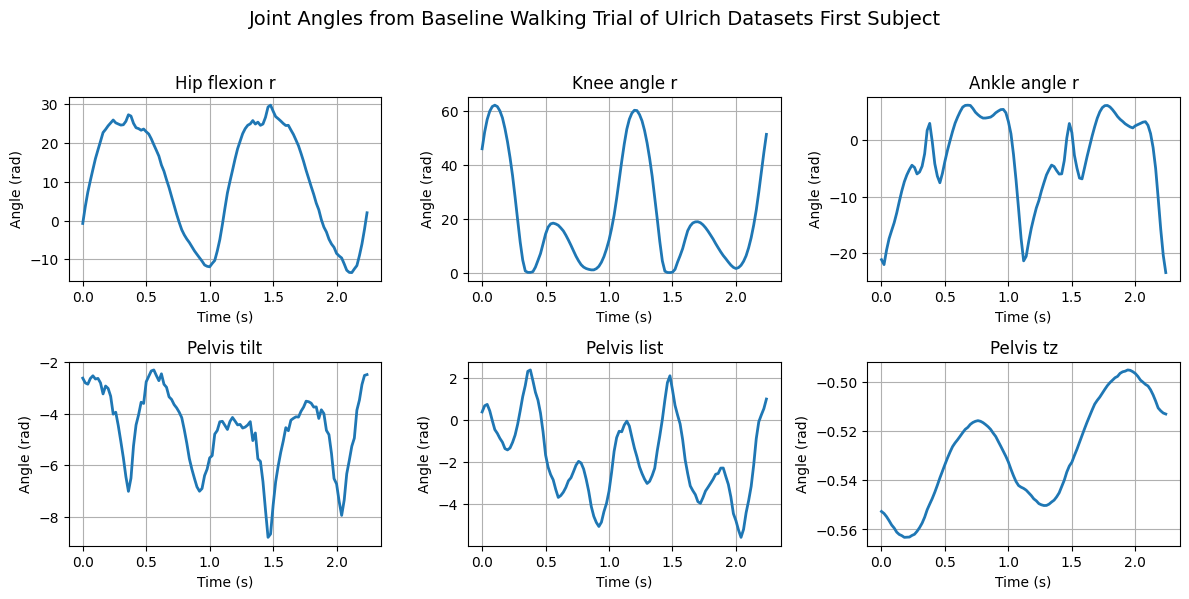

In [126]:
Tik_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/IK/walking_baseline1/output/results_ik.sto"
Tik_df = pd.read_csv(Tik_file, delim_whitespace=True, skiprows=10)
Tik_df.columns = Tik_df.columns.str.strip()
Tik_df = Tik_df[[col for col in kept_cols if col in Tik_df.columns]]
#trim down to similar time chunk
Tik_df_subset = Tik_df[(Tik_df['time'] >= 0) & (Tik_df['time'] <= 2.25)]
#print(Tik_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_names):
    if name in Tik_df_subset.columns:
        ax = axs[i]
        ax.plot(Tik_df_subset['time'], Tik_df_subset[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_names), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Angles from Baseline Walking Trial of Ulrich Datasets First Subject', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


# Plot Inverse Dynamics Results from OA1 

In [84]:
id_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/ID/results_id.sto"
joint_forces = ['hip_flexion_r_moment', 'knee_angle_r_moment', 'ankle_angle_r_moment', 'pelvis_tilt_moment', 'pelvis_list_moment', 'pelvis_tz_force']
id_df = pd.read_csv(id_file, delim_whitespace=True, skiprows=6)
#extract relevant columns
kept_cols = ['time'] + joint_forces
id_df = id_df[kept_cols]
print(id_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_forces):
    if name in id_df.columns:
        ax = axs[i]
        ax.plot(id_df['time'], id_df[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_forces), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Forces from First Walking Trial of Subject OA1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/2522719325.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  id_df = pd.read_csv(id_file, delim_whitespace=True, skiprows=6)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/ID/results_id.sto'

# Plot Inverse Dynamics Results from Ulrich's first subject 

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/236148291.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Uid_df = pd.read_csv(Uid_file, delim_whitespace=True, skiprows=6)


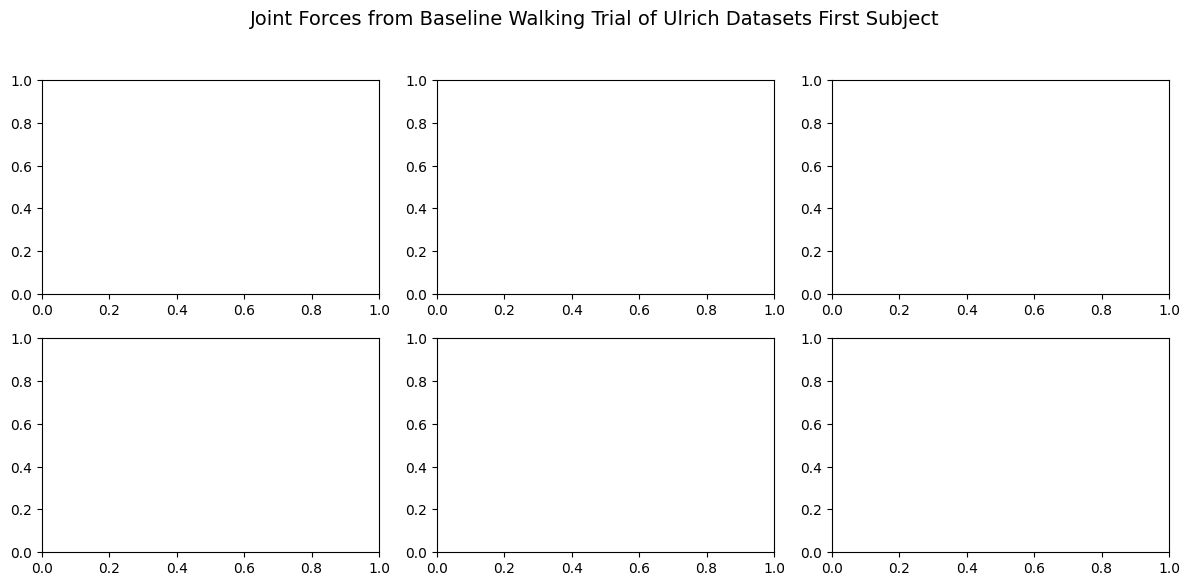

In [128]:
Uid_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/ID/walking_baseline1/output/results_id.sto"
Uid_df = pd.read_csv(Uid_file, delim_whitespace=True, skiprows=6)
Uid_df.columns = Uid_df.columns.str.strip()
Uid_df = Uid_df[[col for col in kept_cols if col in Uid_df.columns]]
#trim down to similar time chunk
Uid_df_subset = Uid_df[(Uid_df['time'] >= 0) & (Uid_df['time'] <= 2.25)]
#print(Uid_df.head())
rows = 3
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(joint_forces):
    if name in Uid_df_subset.columns:
        ax = axs[i]
        ax.plot(Uid_df_subset['time'], Uid_df_subset[name], linewidth=2)
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (rad)')
        ax.grid(True)
for j in range(len(joint_forces), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Joint Forces from Baseline Walking Trial of Ulrich Datasets First Subject', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Plot muscle forces from OA1 Static Optimization Using Rotated Marker Data

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/1218177212.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  OA1_force_rotated_df = pd.read_csv(OA1_force_rotated_file, delim_whitespace=True, skiprows=14)


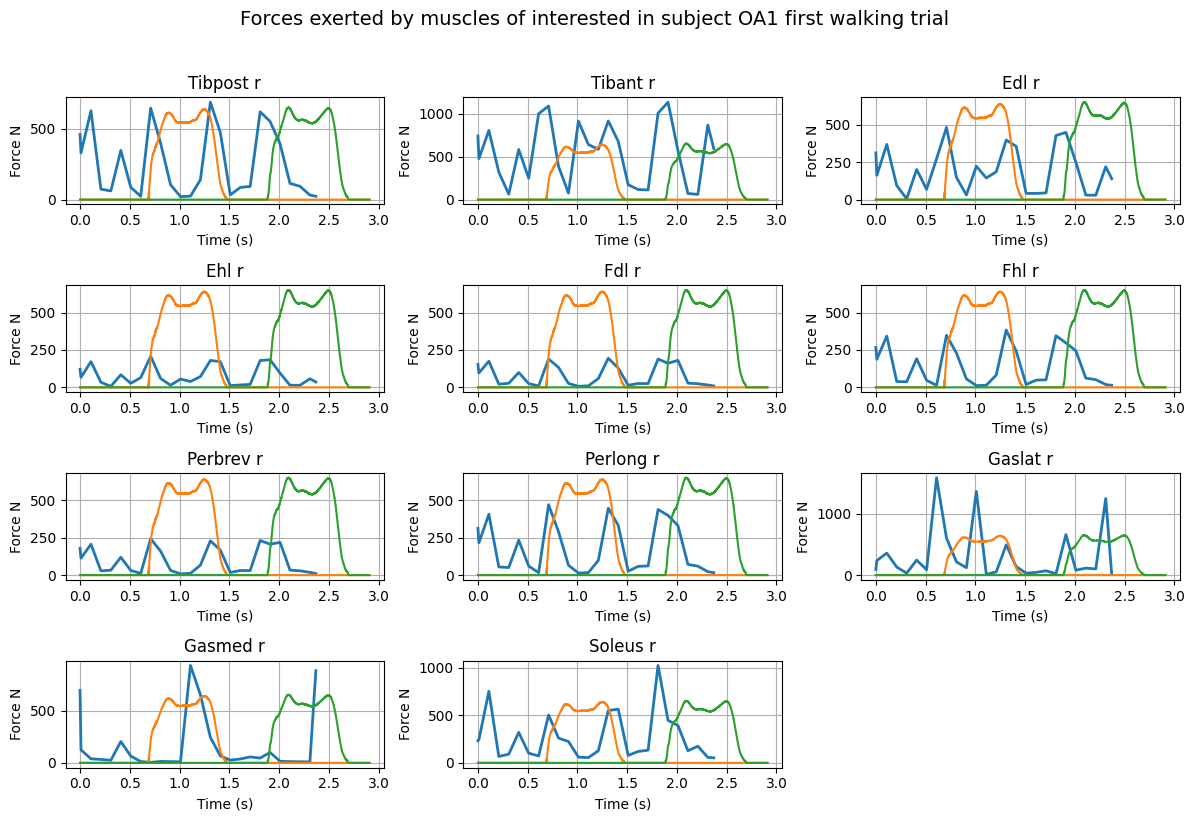

In [135]:
target_muscles = ['tibpost_r', 'tibant_r', 'edl_r', 'ehl_r', 'fdl_r', 'fhl_r',
    'perbrev_r', 'perlong_r',
    'gaslat_r', 'gasmed_r', 'soleus_r'  # using soleus for Achilles
]
OA1_force_rotated_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/Results/SO/Scaled_Model_StaticOptimization_force_rotated.sto"
OA1_force_rotated_df = pd.read_csv(OA1_force_rotated_file, delim_whitespace=True, skiprows=14)
OA1_force_rotated_df.columns = OA1_force_rotated_df.columns.str.strip()
kept_cols = target_muscles + ['time']
OA1_force_rotated_df = OA1_force_rotated_df[[col for col in kept_cols if col in OA1_force_rotated_df.columns]]
#print(OA1_force_rotated_df.head())
rows = 4
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(target_muscles):
    if name in OA1_force_rotated_df.columns:
        ax = axs[i]
        ax.plot(OA1_force_rotated_df['time'], OA1_force_rotated_df[name], linewidth=2)
        ax.plot(raw_df['time'], raw_df['FZ1'], label = 'FZ1')
        ax.plot(raw_df['time'], raw_df['FZ3'], label = 'FZ3')
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Force N')
        ax.grid(True)
for j in range(len(target_muscles), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Forces exerted by muscles of interested in subject OA1 first walking trial', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Plot muscle forces from OA1 Static Optimization Using Raw Marker Data

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/1320114274.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  OA1_force_raw_df = pd.read_csv(OA1_force_raw_file, delim_whitespace=True, skiprows=14)


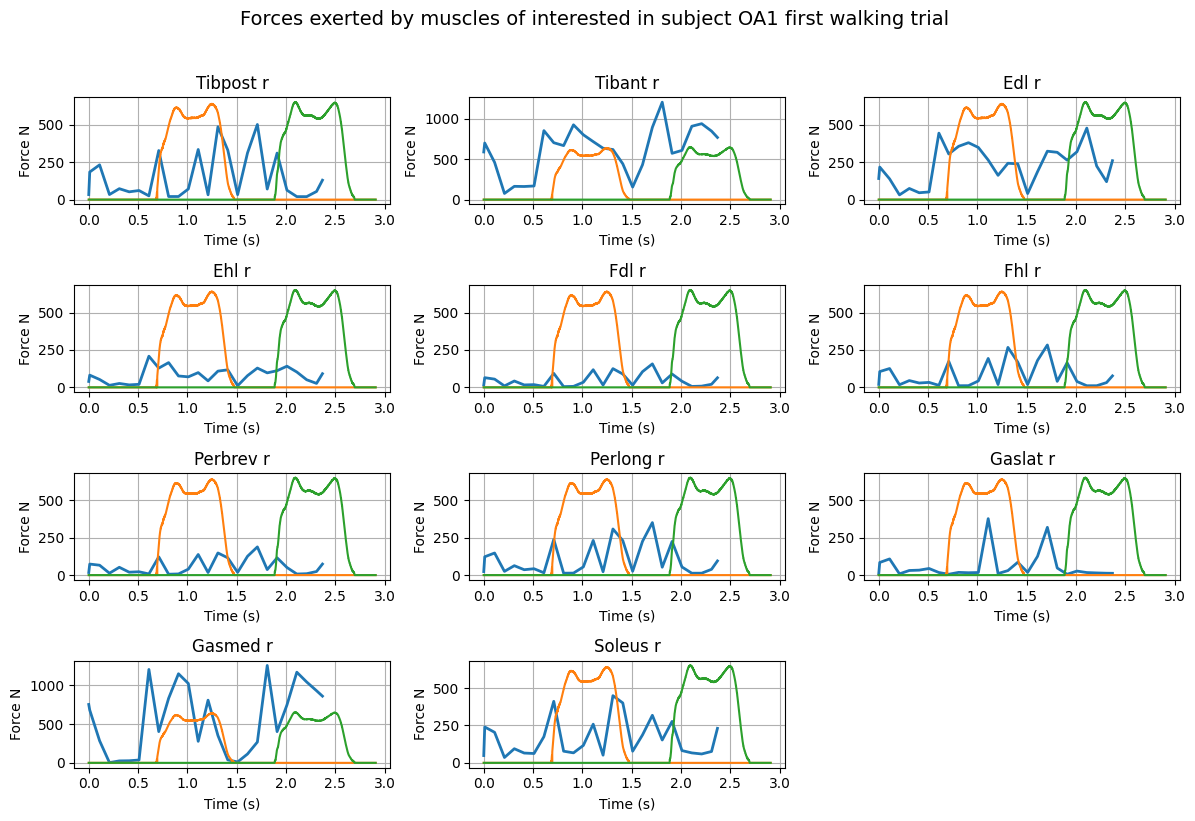

In [136]:

OA1_force_raw_file = "/Users/briankeller/Desktop/GRFMuscleModel/Old Young Walking Data/OA1/Walking/Results/SO/Scaled_Model_StaticOptimization_force_raw.sto"
OA1_force_raw_df = pd.read_csv(OA1_force_raw_file, delim_whitespace=True, skiprows=14)
OA1_force_raw_df.columns = OA1_force_raw_df.columns.str.strip()
kept_cols = target_muscles + ['time']
OA1_force_raw_df = OA1_force_raw_df[[col for col in kept_cols if col in OA1_force_raw_df.columns]]
#print(OA1_force_raw_df.head())
rows = 4
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(target_muscles):
    if name in OA1_force_raw_df.columns:
        ax = axs[i]
        ax.plot(OA1_force_raw_df['time'], OA1_force_raw_df[name], linewidth=2)
        ax.plot(raw_df['time'], raw_df['FZ1'], label = 'FZ1')
        ax.plot(raw_df['time'], raw_df['FZ3'], label = 'FZ3')
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Force N')
        ax.grid(True)
for j in range(len(target_muscles), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Forces exerted by muscles of interested in subject OA1 first walking trial', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Plot muscle forces from Ulrich dataset's first subject walking baseline

/var/folders/ry/__2whx491kl275m5nl07mrnr0000gn/T/ipykernel_2322/1070650444.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject1_df = pd.read_csv(subject1_file, delim_whitespace=True, skiprows=14)


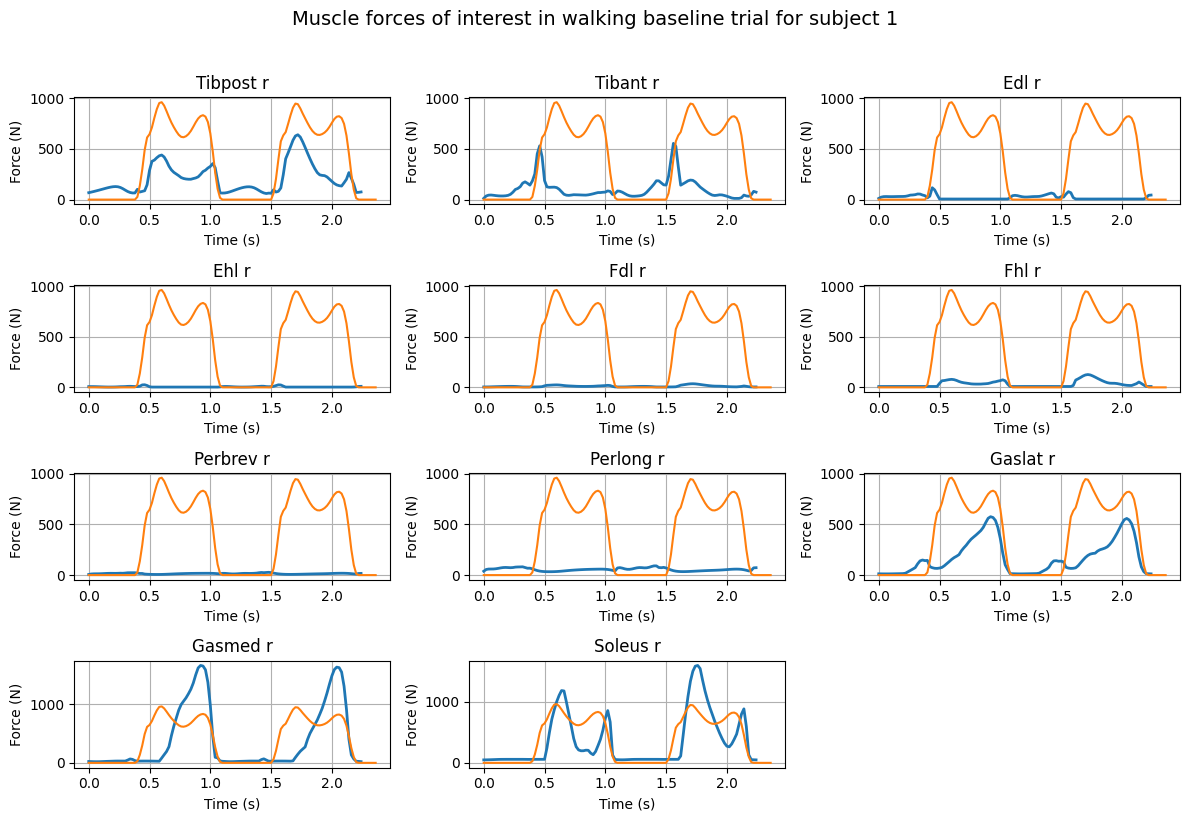

In [137]:
subject1_file = "/Users/briankeller/Desktop/GRFMuscleModel/data/Subject1/StaticOpt/walking_baseline1/results_forces.sto"
subject1_df = pd.read_csv(subject1_file, delim_whitespace=True, skiprows=14)
subject1_df.columns = subject1_df.columns.str.strip()
subject1_df = subject1_df[[col for col in kept_cols if col in subject1_df.columns]]
#trim down to similar time chunk
subject1_df_subset = subject1_df[(subject1_df['time'] >= 0) & (subject1_df['time'] <= 2.25)]
#print(subject1_df.head())
rows = 4
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))
axs = axs.flatten()
for i, name in enumerate(target_muscles):
    if name in subject1_df_subset.columns:
        ax = axs[i]
        ax.plot(subject1_df_subset['time'], subject1_df_subset[name], linewidth=2, label = 'Muscle Force')
        ax.plot(walking_baseline_df_subset['time'], walking_baseline_df_subset['ground_force_vy'], label = 'R Vertical GRF')
        ax.set_title(f'{name.replace("_", " ").capitalize()}', fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Force (N)')
        ax.grid(True)
for j in range(len(target_muscles), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle('Muscle forces of interest in walking baseline trial for subject 1', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()